In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Netflix.csv")

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.describe(include = object)

In [ ]:
data.head(5)

Claening Data - I m not filling NaN values with unknown Columsn Names becoze i do not want those unknown data in my Graphical & Non Graphical Analysis

Cleaning Data - Unesting Columns - Country, Cast, Listed in

I just splitting them, will use explode later whenever needed






In [ ]:
data["country"]=data["country"].str.split(",")
data["cast"]=data["cast"].str.split(",")
data["listed_in"]=data["listed_in"].str.split(",")

In [ ]:
data.head()

Changing Rating Columns from cateogorical to Numerical

1 --> Very Child Friendly
9 --> Stricly adult Content
10 -->Not Rated


In [ ]:
data[data["rating"].isna()]

In [ ]:
data["rating"].value_counts()

In [ ]:
data["numrating"]=data["rating"].replace(["TV-Y","TV-Y7","TV-Y7-FV","TV-G","G","TV-PG","PG","PG-13","TV-14","R","TV-MA","NC-17","NR","UR","74 min","84 min","66 min"],[1,2,3,4,4,5,5,6,7,8,9,9,10,10,10,10,10])

In [ ]:
data.info()

In [ ]:
data["numrating"].value_counts().reset_index()

changing Dtype to datetime

In [ ]:
data["date_added"]=data["date_added"].astype("datetime64")

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  numrating     8803 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [57]:
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

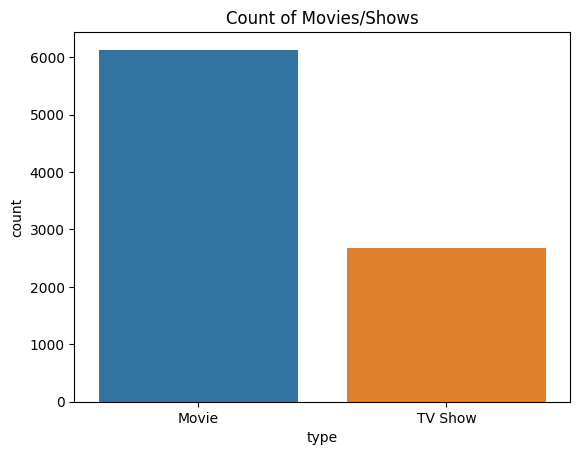

In [64]:
sns.countplot(data = data,x="type")
plt.title("Count of Movies/Shows")
plt.show()

In [65]:
data["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

<Axes: xlabel='director', ylabel='Count'>

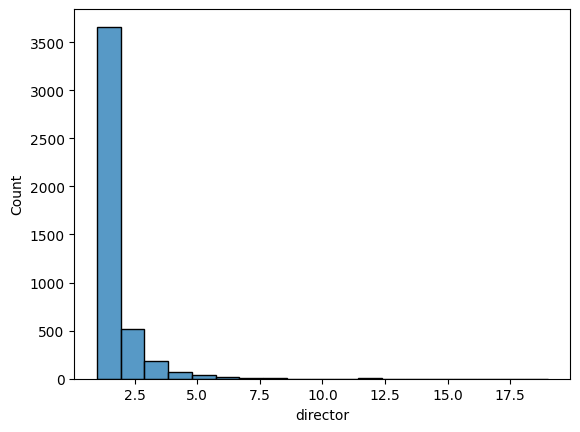

In [70]:
A =data["director"].value_counts().reset_index()
sns.histplot(A["director"],bins=19)

In [72]:
data.explode("country")["country"].value_counts()

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: country, Length: 197, dtype: int64

<Axes: xlabel='country', ylabel='count'>

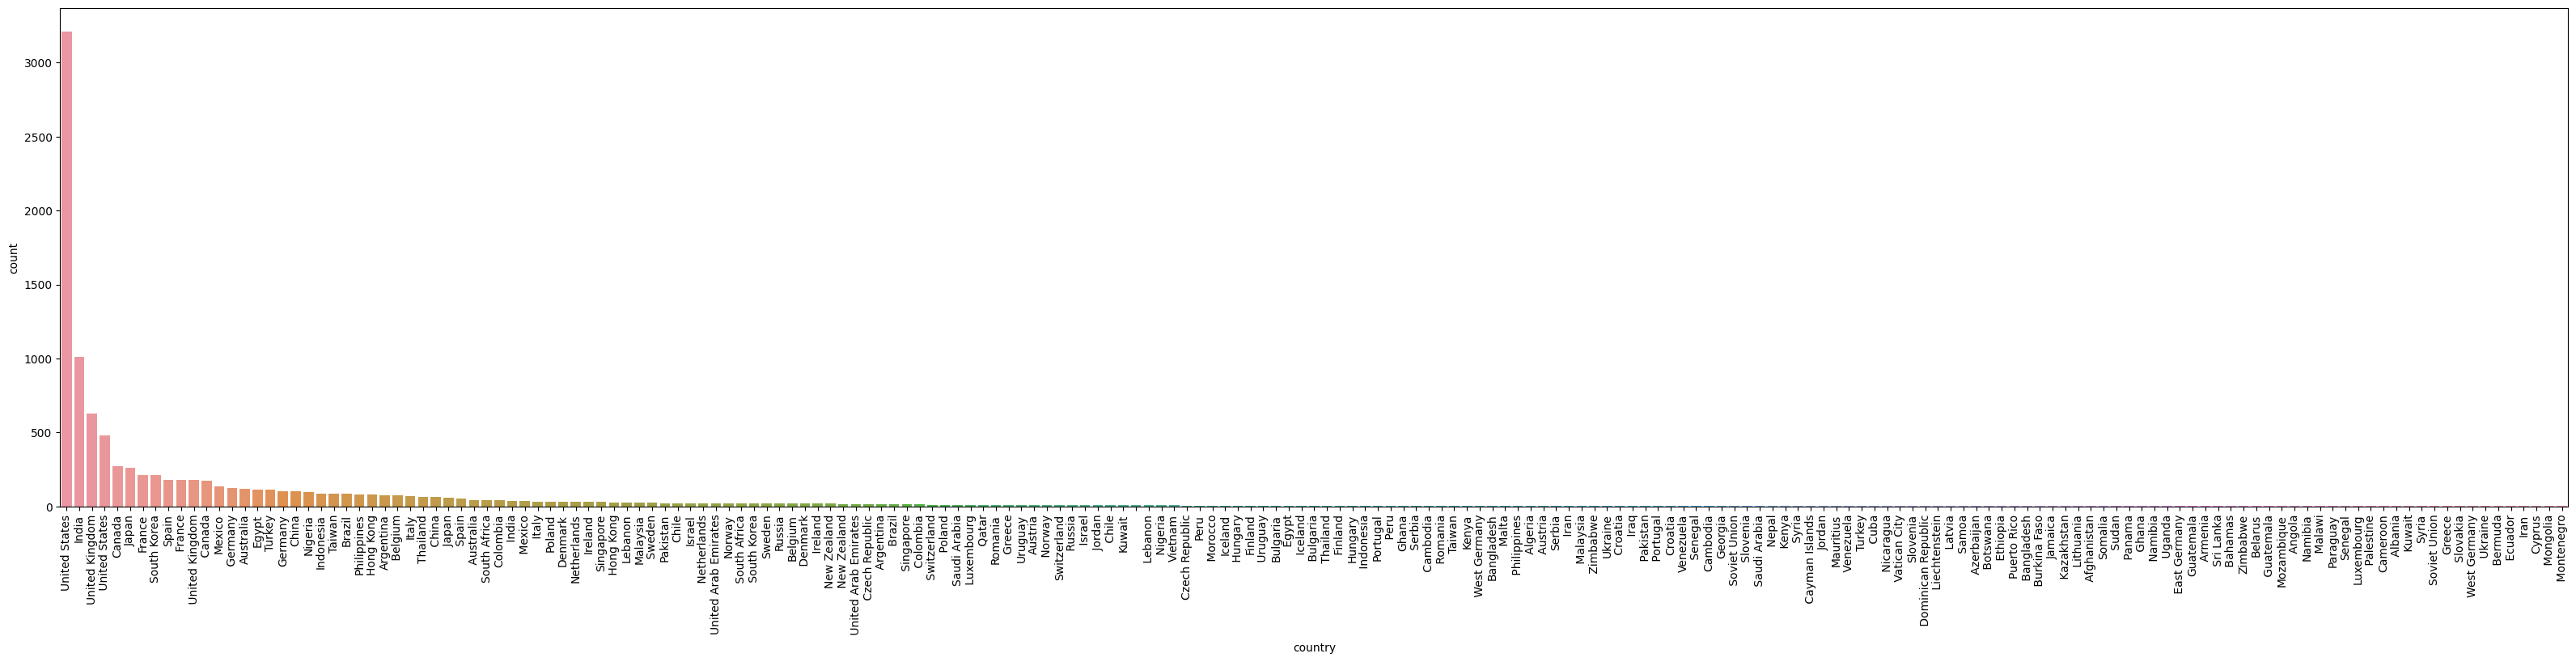

In [84]:
plt.figure(figsize=(40,8))
plt.xticks(rotation=90,fontsize = 10)
sns.countplot(data = data.explode("country"), x ="country" ,order =data.explode("country")["country"].value_counts().index )

<Axes: xlabel='index', ylabel='country'>

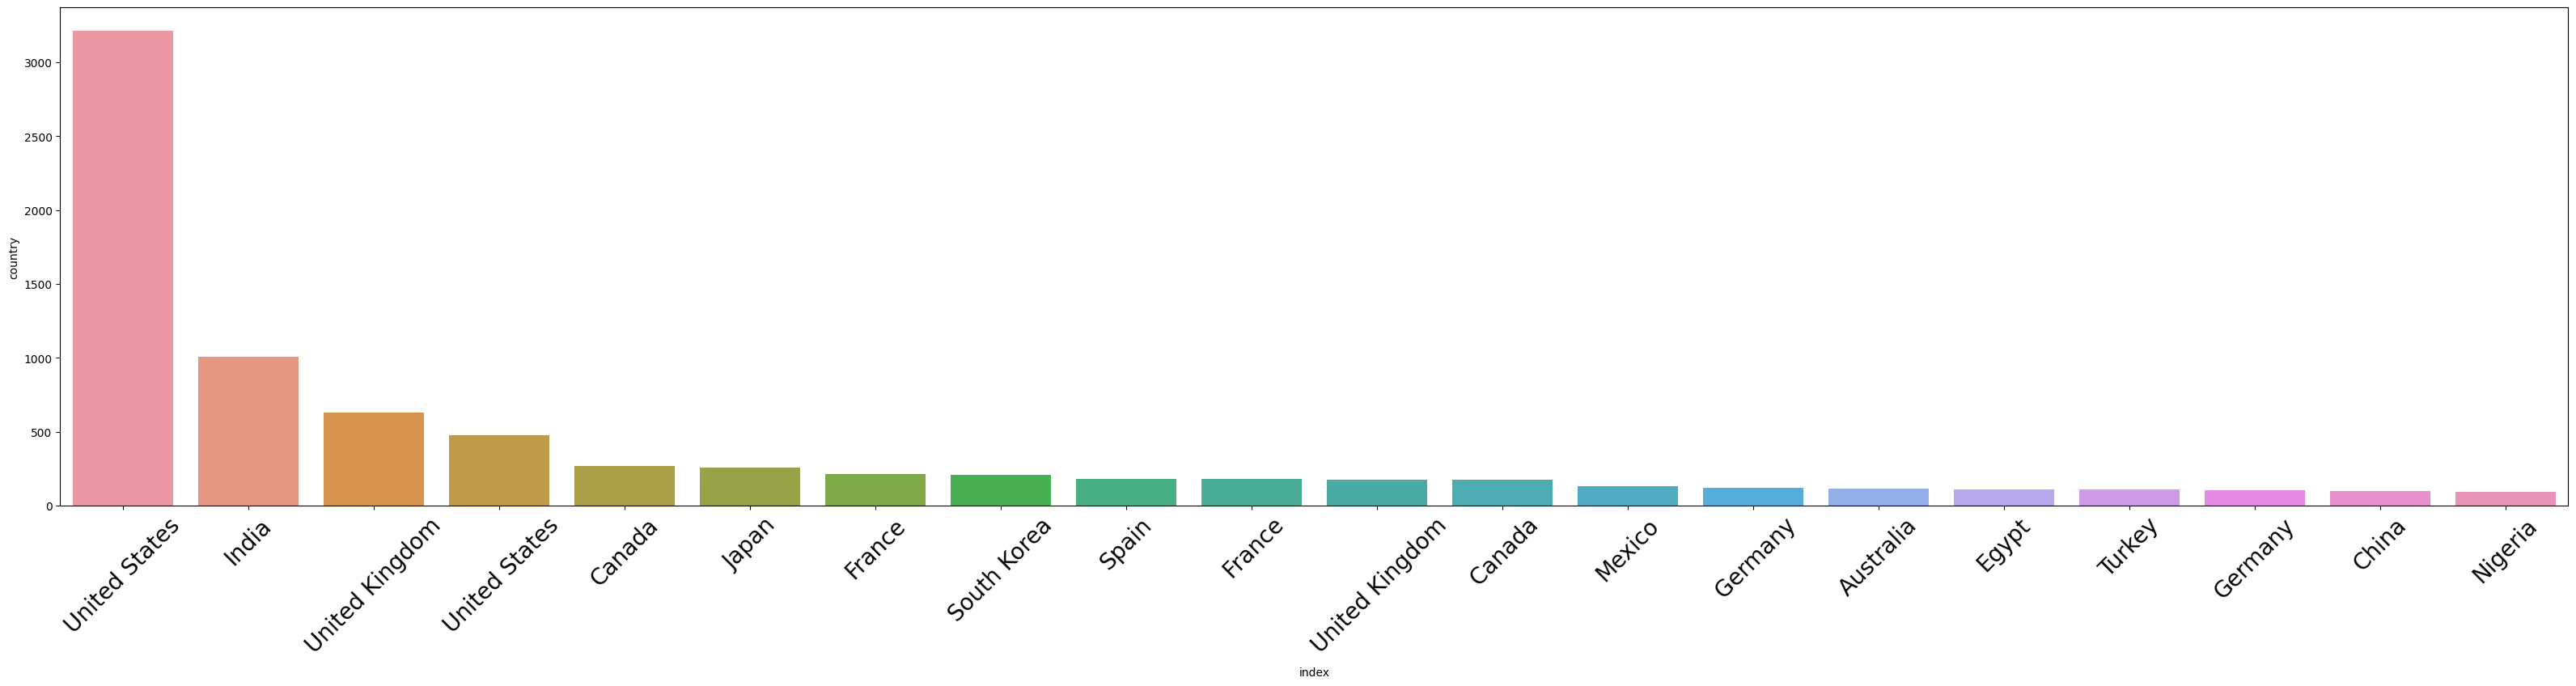

In [93]:
A = data.explode("country")["country"].value_counts().reset_index().iloc[:20]
plt.figure(figsize=(40,8))
plt.xticks(rotation=45,fontsize = 20)
sns.barplot(data=A,x="index",y="country")

In [100]:
showdata = data[data["type"] == "TV Show"].reset_index()
moviedata = data[data["type"] == "Movie"].reset_index()

In [101]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'numrating'],
      dtype='object')

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data= data["date_added"].dt.week.reset_index(), x="date_added")
plt.show()

In [ ]:
data.explode("director").groupby("director")["title"].count().sort_values(ascending=False)